<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-2-mg-ext/12-AMG-coarse-mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### You may need to install pyamg

In [ ]:
!pip install pyamg

In [1]:
import pyamg
import numpy
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib notebook

Load some data

In [2]:
#data = loadmat('square.mat')
data = pyamg.gallery.load_example('airfoil')

Create vertices and edges (for plotting)

In [3]:
A = data['A'].tocsr()                              # matrix
V = data['vertices'][:A.shape[0]]                  # vertices of each variable
E = numpy.vstack((A.tocoo().row,A.tocoo().col)).T  # edges of the matrix graph

create an AMG hierarchy

In [4]:
mls = pyamg.ruge_stuben_solver(A, max_levels=2, max_coarse=1,
                               CF='RS',keep=True)
print(mls)

multilevel_solver
Number of Levels:     2
Operator Complexity:  1.416
Grid Complexity:      1.296
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0          260         1682 [70.64%]
    1           77          699 [29.36%]



<IPython.core.display.Javascript object>


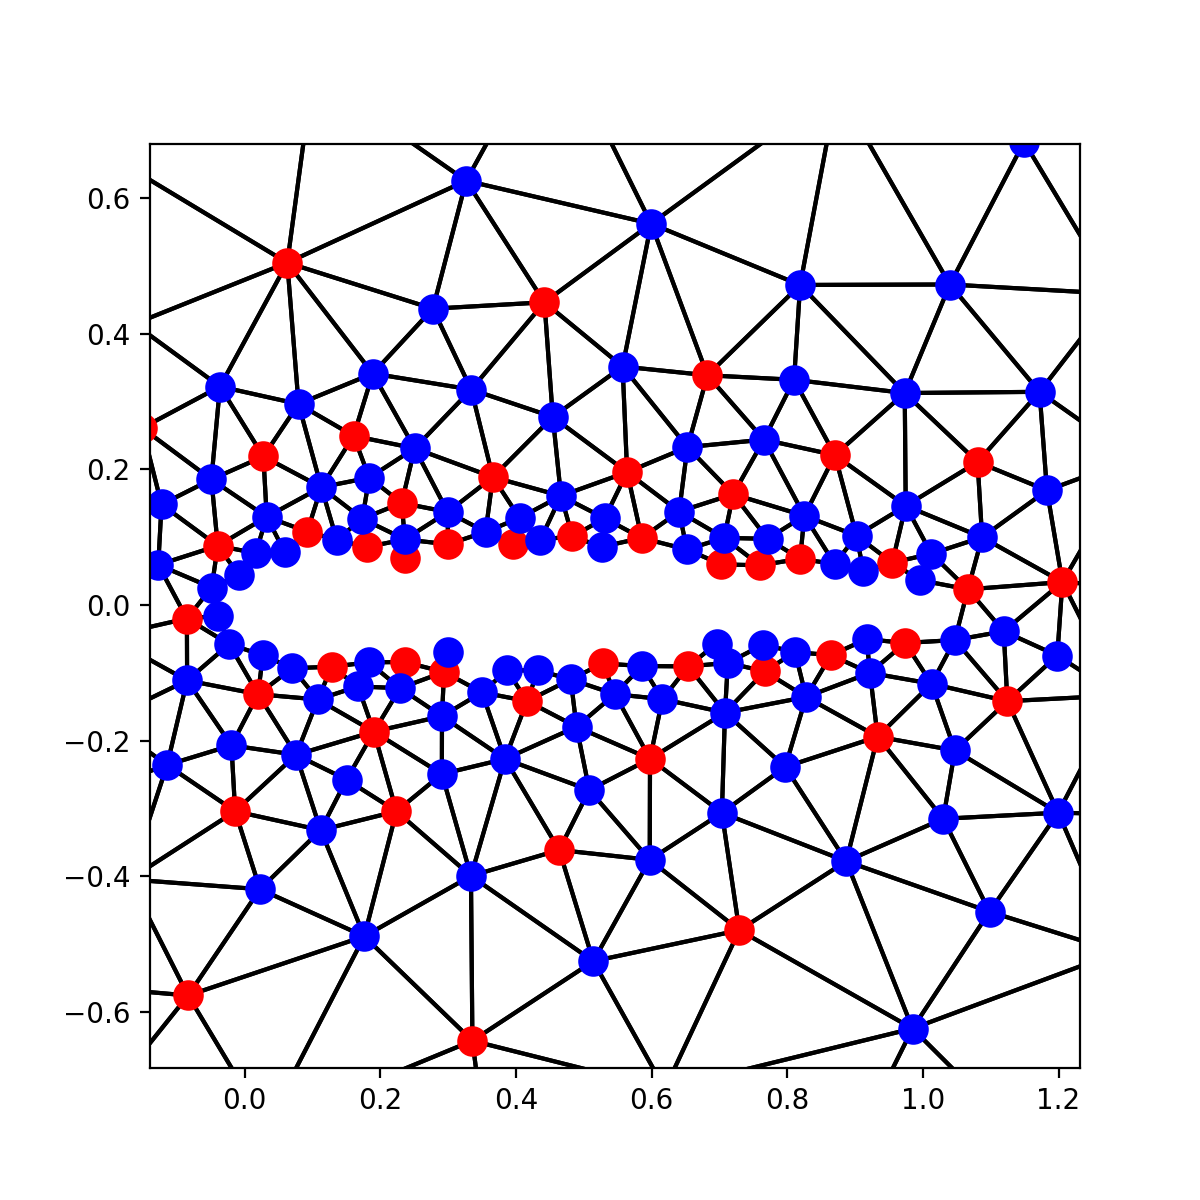

In [5]:
# The CF splitting, 1 == C-node and 0 == F-node
splitting = mls.levels[0].splitting
C_nodes = splitting == 1
F_nodes = splitting == 0

plt.figure(figsize=(6,6))
plt.axis('equal')

for e in E:
    plt.plot(V[e,0], V[e,1], 'k-', zorder=1)
    
plt.scatter(V[:,0][C_nodes], V[:,1][C_nodes], c='r', s=100.0, zorder=2)  #plot C-nodes in red
plt.scatter(V[:,0][F_nodes], V[:,1][F_nodes], c='b', s=100.0, zorder=2)  #plot F-nodes in blue